# 1) Data Preprocessing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,Embedding
from tensorflow.keras.models import Model

In [4]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# drop garbage columns
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns
df.columns=['labels','data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# create binary labels 0 and 1

df['b_labels'] = df['labels'].map({'ham':0,'spam':1}) #create new cols
y = df['b_labels'].values

In [9]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(df['data'],y,test_size=0.33)

In [10]:
# convert the sentences to sequences

# data in text, need to apply embedding technique
# backofward 


In [11]:
max_vocab_size=20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [12]:
# fit tokenizer to model
tokenizer.fit_on_texts(X_train)

In [13]:
# convert 
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

In [14]:
sequence_train[0]

[131,
 1264,
 1,
 68,
 3,
 1,
 148,
 2,
 90,
 1,
 365,
 25,
 13,
 1755,
 7,
 1756,
 2,
 210,
 3,
 548,
 11,
 3497,
 421,
 1,
 70,
 3,
 1,
 82,
 3,
 1,
 1112,
 3]

In [15]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [16]:
sequence_train[1]

[107,
 135,
 15,
 18,
 29,
 1,
 37,
 187,
 15,
 44,
 19,
 989,
 437,
 76,
 379,
 34,
 21,
 9,
 47]

In [17]:
# check word index mapping (to check the number of words in vocab)

In [18]:
word2idx = tokenizer.word_index
V =len(word2idx)
print('Total num of unique tokens are : %s'% V)

Total num of unique tokens are : 7303


In [19]:
# pad sequences (to get N x T matrix)
data_train = pad_sequences(sequence_train)
print('Shape of data train tensor:',data_train.shape)

# N: number of samples and T: Number of time steps

Shape of data train tensor: (3733, 189)


In [22]:
# set the value of T to get sequence length
T = data_train.shape[1]
print(T)

189


In [23]:
# pad the test set
data_test = pad_sequences(sequence_test,maxlen=T)

# maxlen= T, to truncate longer sentences in test set
print('Shape of data test tensor:',data_test.shape)

Shape of data test tensor: (1839, 189)


# 2)Building the model

In [20]:
# LSTM = Long short term memor

In [27]:
# Choose the embedding dimensionality
D = 20  # this is a hyper parameteer, we can choose any word vector size that we want

# Hidden state vectorsize (dimensionality)
M = 15

# Input layer
i = Input(shape=(T,))  # input layer taakes in sequences of integers, so shape is T

# Embedding layer
x = Embedding(V+1,D)(i)  # This takes in sequences of integers and returns sequences of word vectors


# This will be an N*T*D array
# We want size of embedding to (V+1) xD, because first word index starts from 1 and not 0


# LSTM Layer
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)


# Dense layer
x = Dense(1,activation ='sigmoid')(x)
# it is a binary classification problem, so we are using activation function ='sigmoid'


# define this model
model = Model(i,x)

In [28]:
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
# Train the model
r = model.fit(x=data_train,y=y_train,epochs=10,validation_data=(data_test,y_test))

Epoch 1/10
117/117 [==============================] - 11s 79ms/step - loss: 0.5696 - accuracy: 0.8103 - val_loss: 0.3660 - val_accuracy: 0.8635

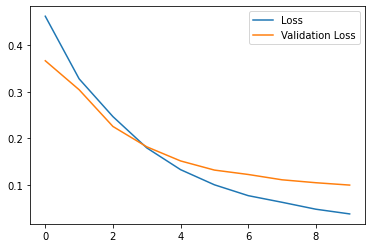

In [30]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

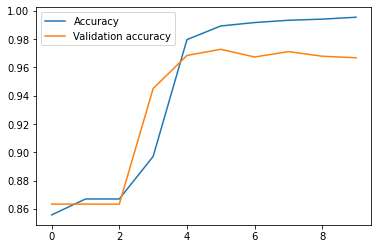

In [31]:
# Accuray per iteration
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.show()